In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


(10000, 3072) (10000, 10)
(2000, 3072) (2000, 10)
gd...
iter 0: test accuracy 0.104
iter 0: training cost 2.30026 

iter 100: test accuracy 0.332
iter 100: training cost 1.86495 

iter 200: test accuracy 0.3805
iter 200: training cost 1.71288 

iter 300: test accuracy 0.4195
iter 300: training cost 1.58974 

iter 400: test accuracy 0.448
iter 400: training cost 1.49246 

iter 500: test accuracy 0.495
iter 500: training cost 1.34806 

iter 600: test accuracy 0.5165
iter 600: training cost 1.26568 

iter 700: test accuracy 0.5155
iter 700: training cost 1.17504 

iter 800: test accuracy 0.521
iter 800: training cost 1.08322 

iter 900: test accuracy 0.527
iter 900: training cost 0.999628 

momentum...
iter 0: test accuracy 0.139
iter 0: training cost 2.29691 

iter 100: test accuracy 0.331
iter 100: training cost 1.86253 

iter 200: test accuracy 0.3895
iter 200: training cost 1.68697 

iter 300: test accuracy 0.441
iter 300: training cost 1.55535 

iter 400: test accuracy 0.4605
iter 40

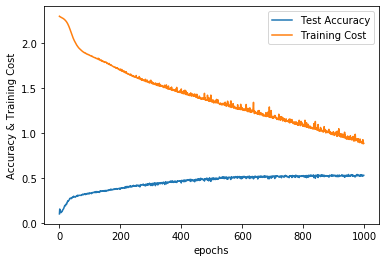

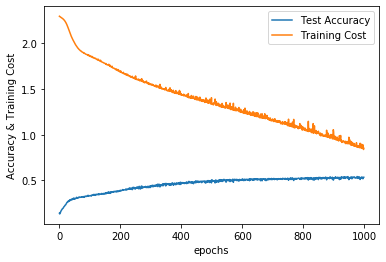

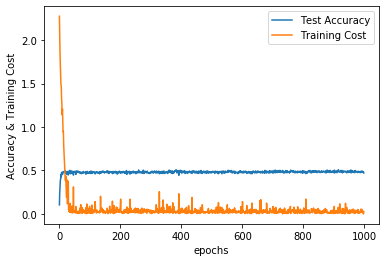

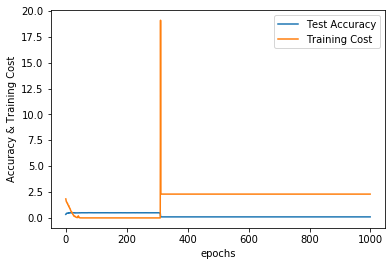

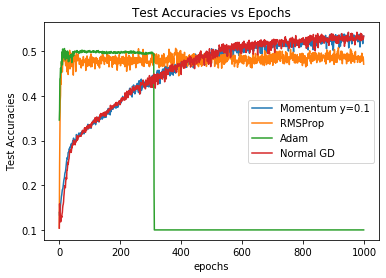

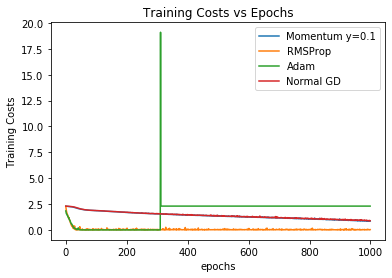

In [3]:
import math
import tensorflow as tf
import numpy as np
import pylab as plt
import pickle
import os

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')


NUM_CLASSES = 10
IMG_SIZE = 32
NUM_CHANNELS = 3
learning_rate = 0.001
no_epochs = 1000
batch_size = 128
features_map_1 = 100
features_map_2 = 100


seed = 10
np.random.seed(seed)
tf.set_random_seed(seed)

def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  #python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    
    labels_ = np.zeros([labels.shape[0], NUM_CLASSES])
    labels_[np.arange(labels.shape[0]), labels-1] = 1

    return data, labels_


def cnn(images):

    images = tf.reshape(images, [-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS])
    
    #Conv 1
    W_conv1 = weight_variable([9, 9, NUM_CHANNELS, features_map_1], stddev=1.0/np.sqrt(NUM_CHANNELS*9*9), name='h_weight1')
    b_conv1 = bias_variable([features_map_1], name='h_biases1')
    u_conv1 = tf.nn.conv2d(images, W_conv1, strides=[1, 1, 1, 1], padding='VALID') + b_conv1
    h_conv1 = tf.nn.relu(u_conv1)

    #Pooling layer, max pool
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='VALID', name='h_pool1')
   
    #Conv 2
    W_conv2 = weight_variable([5, 5, features_map_1, features_map_2], stddev=1.0/np.sqrt(features_map_1*5*5), name='h_weight2' )
    b_conv2 = bias_variable([features_map_2], name='h_biases2')
    u_conv2 = tf.nn.conv2d(h_pool1, filter=W_conv2, strides=[1, 1, 1, 1], padding='VALID') + b_conv2
    h_conv2 = tf.nn.relu(u_conv2)

    #Pooling layer 2, max pool
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='h_pool2')
   
    #Flatten the output
    dim = h_pool2.get_shape()[1].value * h_pool2.get_shape()[2].value * h_pool2.get_shape()[3].value 
    pool_2_flat = tf.reshape(h_pool2, [-1, dim])

    #Full connected layer 
    W_fc1 = weight_variable([dim, 300], 1.0/np.sqrt(dim), name='weights_fc1')
    b_fc1 = bias_variable([300], name='bias_fc1')
    u_fc1 = tf.matmul(pool_2_flat, W_fc1) + b_fc1
    h_fc1 = tf.nn.relu(u_fc1)
	
    #Softmax
    W_fc2 = weight_variable([300, NUM_CLASSES], stddev=1.0/np.sqrt(dim), name='weights_fc2')
    b_fc2 = tf.Variable(tf.zeros([NUM_CLASSES]), name='bias_fc2')

    y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

    return W_conv1, h_conv1, h_pool1, h_conv2, h_pool2, y_conv


def weight_variable(shape, stddev, name):
    initial = tf.truncated_normal(shape, stddev=stddev)
    return tf.Variable(initial, name=name)


def bias_variable(shape, name):
    return tf.Variable(tf.zeros(shape), name=name)


def main():

    trainX, trainY = load_data('drive/My Drive/CZ4042 Neural Network project/project 2/Part A/data_batch_1')
    print(trainX.shape, trainY.shape)
    
    testX, testY = load_data('drive/My Drive/CZ4042 Neural Network project/project 2/Part A/test_batch_trim')
    print(testX.shape, testY.shape)

    trainX = (trainX - np.min(trainX, axis = 0))/np.max(trainX, axis = 0)
    testX = (testX - np.min(testX, axis = 0))/np.max(testX, axis = 0)

    # Create the model
    x = tf.placeholder(tf.float32, [None, IMG_SIZE*IMG_SIZE*NUM_CHANNELS])
    y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])
    
    W_conv1, h_conv1, h_pool1, h_conv2, h_pool2, y_conv = cnn(x)

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv)
    loss = tf.reduce_mean(cross_entropy)

    # Normal GD
    train_step1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    # 3A
    train_step2 = tf.train.MomentumOptimizer(learning_rate, 0.1).minimize(loss)
    # 3B
    train_step3 = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
    # 3C
    train_step4 = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    # 3D
    train_step5 = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)

    N = len(trainX)
    idx = np.arange(N)
    with tf.Session() as sess:

        # Normal gd
        print('gd...')
        sess.run(tf.global_variables_initializer())

        test_acc1 = []
        train_cost1 =[]

        for i in range(no_epochs):
            np.random.shuffle(idx)
            trainX, trainY = trainX[idx], trainY[idx]

            for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)):
                train_step1.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})
            
            train_cost1.append(loss.eval(feed_dict={x: trainX, y_: trainY}))
            test_acc1.append(accuracy.eval(feed_dict={x: testX, y_: testY}))

            if i%100 == 0:
              print('iter %d: test accuracy %g'%(i, test_acc1[i]))
              print('iter %d: training cost %g'%(i, train_cost1[i]),'\n')

        plt.figure(1)
        plt.plot(np.arange(no_epochs), test_acc1, label='Normal GD')
        plt.plot(np.arange(no_epochs), train_cost1)
        
        plt.xlabel('epochs')
        plt.ylabel('Accuracy & Training Cost')
        plt.legend(['Test Accuracy', 'Training Cost'],loc='upper right')
        plt.savefig('./figures/3.png')      

        # 3A
        print('momentum...')
        sess.run(tf.global_variables_initializer())

        test_acc2 = []
        train_cost2 = []
        for i in range(no_epochs):
          np.random.shuffle(idx)
          trainX, trainY = trainX[idx], trainY[idx]

          for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)):
              train_step2.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})
          
          test_acc2.append(accuracy.eval(feed_dict={x: testX, y_: testY}))
          train_cost2.append(loss.eval(feed_dict={x: trainX, y_: trainY}))

          if i%100==0:
            print('iter %d: test accuracy %g'%(i, test_acc2[i]))
            print('iter %d: training cost %g'%(i, train_cost2[i]),'\n')

        plt.figure(2)
        plt.plot(np.arange(no_epochs), test_acc2, label='momentum')
        plt.plot(np.arange(no_epochs), train_cost2)
        
        plt.xlabel('epochs')
        plt.ylabel('Accuracy & Training Cost')
        plt.legend(['Test Accuracy', 'Training Cost'],loc='upper right')
        plt.savefig('./figures/3A.png')  

        # 3B
        print('RMSProp...')
        sess.run(tf.global_variables_initializer())

        test_acc3 = []
        train_cost3 = []
        for i in range(no_epochs):
          np.random.shuffle(idx)
          trainX, trainY = trainX[idx], trainY[idx]

          for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)):
              train_step3.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})

          test_acc3.append(accuracy.eval(feed_dict={x: testX, y_: testY}))
          train_cost3.append(loss.eval(feed_dict={x: trainX, y_: trainY}))

          if i%100==0:
            print('iter %d: test accuracy %g'%(i, test_acc3[i]))
            print('iter %d: training cost %g'%(i, train_cost3[i]), '\n')

        plt.figure(3)
        plt.plot(np.arange(no_epochs), test_acc3, label='RMSProp')
        plt.plot(np.arange(no_epochs), train_cost3)
        
        plt.xlabel('epochs')
        plt.ylabel('Accuracy & Training Cost')
        plt.legend(['Test Accuracy', 'Training Cost'],loc='upper right')
        plt.savefig('./figures/3B.png')  

        # 3C
        print('AdamOp...')
        sess.run(tf.global_variables_initializer())

        test_acc4 = []
        train_cost4 = []
        for i in range(no_epochs):
          np.random.shuffle(idx)
          trainX, trainY = trainX[idx], trainY[idx]

          for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)):
              train_step4.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})
          
          test_acc4.append(accuracy.eval(feed_dict={x: testX, y_: testY}))
          train_cost4.append(loss.eval(feed_dict={x: trainX, y_: trainY}))

          if i%100==0:
            print('iter %d: test accuracy %g'%(i, test_acc4[i]))
            print('iter %d: training cost %g'%(i, train_cost4[i]), '\n')

        plt.figure(4)
        plt.plot(np.arange(no_epochs), test_acc4, label='AdamOp')
        plt.plot(np.arange(no_epochs), train_cost4)
        
        plt.xlabel('epochs')
        plt.ylabel('Accuracy & Training Cost')
        plt.legend(['Test Accuracy', 'Training Cost'],loc='upper right')
        plt.savefig('./figures/3C.png')      

        # # 3D
        # print('gd with dropout...')
        # sess.run(tf.global_variables_initializer())

        # test_acc5 = []
        # train_cost5 = []
    
        # for i in range(no_epochs):
        #     np.random.shuffle(idx)
        #     trainX, trainY = trainX[idx], trainY[idx]

        #     for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)):
        #         train_step5.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})

        #     train_cost5.append(loss.eval(feed_dict={x: trainX, y_: trainY}))
        #     test_acc5.append(accuracy.eval(feed_dict={x: testX, y_: testY}))

        #     if i%100 == 0:
        #       print('iter %d: test accuracy %g'%(i, test_acc5[i]))
        #       print('iter %d: training cost %g'%(i, train_cost5[i]), '\n')

        # plt.figure(5)
        # plt.plot(np.arange(no_epochs), test_acc5, label='GD with Dropouts')
        # plt.plot(np.arange(no_epochs), train_cost5)
        
        # plt.xlabel('epochs')
        # plt.ylabel('Accuracy & Training Cost')
        # plt.legend(['Test Accuracy', 'Training Cost'],loc='upper right')
        # plt.savefig('./figures/3D.png') 

        #Test Accuracies vs Epochs
        plt.figure(6)
        plt.plot(np.arange(no_epochs), test_acc2, label='Momentum y=0.1')
        plt.plot(np.arange(no_epochs), test_acc3, label='RMSProp')
        plt.plot(np.arange(no_epochs), test_acc4, label='Adam')
        plt.plot(np.arange(no_epochs), test_acc1, label='Normal GD')
        plt.xlabel('epochs')
        plt.ylabel('Test Accuracies')
        plt.title('Test Accuracies vs Epochs')
        plt.legend(loc='best')
        plt.savefig('./figures/Q3_TestAccuracy_vs_Epochs.png')     
        
        #Training Costs vs Epochs
        plt.figure(7)
        plt.plot(np.arange(no_epochs), train_cost2, label='Momentum y=0.1')
        plt.plot(np.arange(no_epochs), train_cost3, label='RMSProp')
        plt.plot(np.arange(no_epochs), train_cost4, label='Adam')
        plt.plot(np.arange(no_epochs), train_cost1, label='Normal GD')
        plt.xlabel('epochs')
        plt.ylabel('Training Costs')
        plt.title('Training Costs vs Epochs')
        plt.legend(loc='best')
        plt.savefig('./figures/Q3_TrainCosts_vs_Epochs.png')

        plt.show()
       
if __name__ == '__main__':
  main()
